In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_absolute_error,auc,accuracy_score,precision_score,confusion_matrix,recall_score
import warnings
trr = DecisionTreeClassifier()
labenc = LabelEncoder()
scal = StandardScaler()
warnings.filterwarnings("ignore")

In [2]:
def res(y_pred_test,y_test):
    print("Accurcey Score          " , accuracy_score(y_pred_test,y_test))
    print("Precession Score        " , precision_score(y_pred_test,y_test))
    print("Recall Score            ",recall_score(y_pred_test,y_test) )
    print("Confusion Metrics    \n" , confusion_matrix(y_pred_test,y_test))

In [3]:
f = pd.read_csv("Fraud_check.csv")
f.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
c=  f.copy()

In [5]:
def ch(x):
    if (x>30000):
        return 1
    else:
        return 0

In [6]:
f["target"]=f["Taxable.Income"].apply(ch)

In [7]:
f.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,target
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1


In [8]:
x = f.drop(labels=["target","Taxable.Income"], axis = 1)
y = f[["target"]]

([<matplotlib.patches.Wedge at 0x225666eaa60>,
 [Text(-0.8761829480172373, 0.6650589760343238, ''),
  Text(0.8761829791508938, -0.6650589350172393, '')],
 [Text(-0.4779179716457657, 0.36275944147326755, '79.33'),
  Text(0.4779179886277602, -0.36275941910031234, '20.67')])

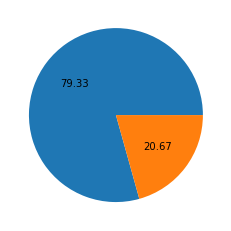

In [32]:
plt.pie(y["target"].value_counts(),autopct="%.2f")

In [9]:
x["Undergrad"]=labenc.fit_transform(x["Undergrad"])
x["Marital.Status"]=labenc.fit_transform(x["Marital.Status"])
x["Urban"]=labenc.fit_transform(x["Urban"])


In [10]:
x.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)


([<matplotlib.patches.Wedge at 0x22565fbeac0>,
 [Text(-0.8222591869132486, 0.730677650908226, ''),
  Text(0.8222592211187371, -0.7306776124154948, '')],
 [Text(-0.4485050110435901, 0.39855144594994146, '76.88'),
  Text(0.44850502970112927, -0.3985514249539062, '23.13')])

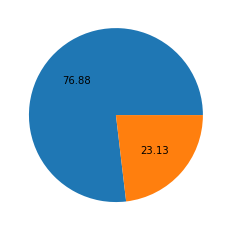

In [31]:
plt.pie(y_train["target"].value_counts(),autopct="%.2f")

In [11]:
mm=GridSearchCV(trr, {"criterion" : ("gini", "entropy"),
                  "max_depth" : (1,4,5,6,7,8,9,10),
                  "splitter" : ("best", "random")},     cv=5    )

In [12]:
mm.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (1, 4, 5, 6, 7, 8, 9, 10),
                         'splitter': ('best', 'random')})

In [13]:
mm.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [14]:
mm.best_score_

0.7933333333333332

For Test Data
Accurcey Score           0.7916666666666666
Precession Score         1.0
Recall Score             0.7916666666666666
Confusion Metrics    
 [[ 0  0]
 [25 95]]
For Train Data
Accurcey Score           0.80625
Precession Score         1.0
Recall Score             0.8037974683544303
Confusion Metrics    
 [[  6   0]
 [ 93 381]]


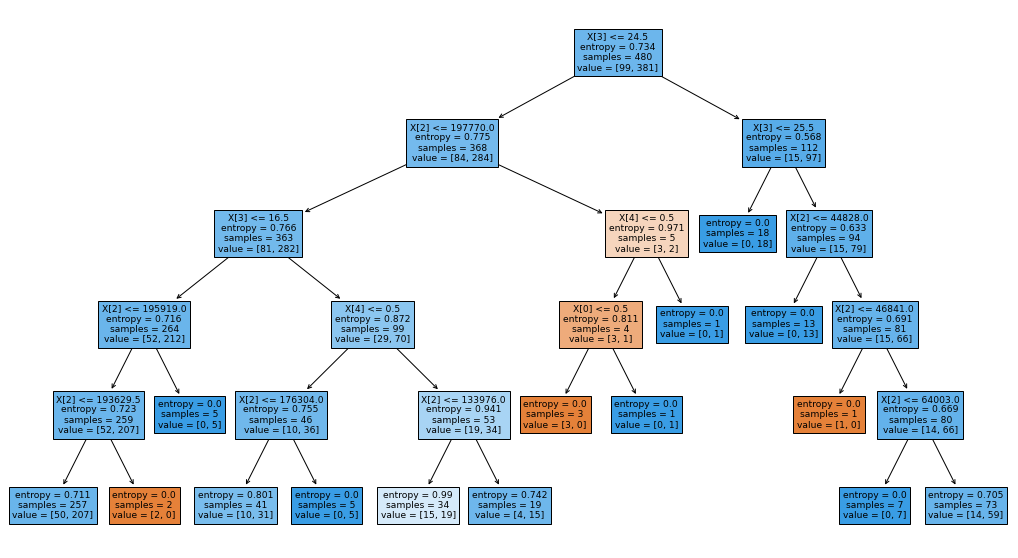

In [15]:
plt.figure(figsize=(18,10))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12,stratify=y)
trr = DecisionTreeClassifier(criterion="entropy",max_depth=5,splitter="best")
trr.fit(x_train,y_train)
y_pred_test = trr.predict(x_test)
y_pred_train = trr.predict(x_train)
print ("For Test Data")
print("====================")
res(y_pred_test,y_test)
print("====================")
print ("For Train Data")
print("====================")
res(y_pred_train,y_train)

plot_tree(trr, filled=True);

### After Scalled

For Test Data
Accurcey Score           0.8
Precession Score         0.986013986013986
Recall Score             0.8057142857142857
Confusion Metrics    
 [[  3   2]
 [ 34 141]]
For Train Data
Accurcey Score           0.8142857142857143
Precession Score         1.0
Recall Score             0.8102189781021898
Confusion Metrics    
 [[  9   0]
 [ 78 333]]


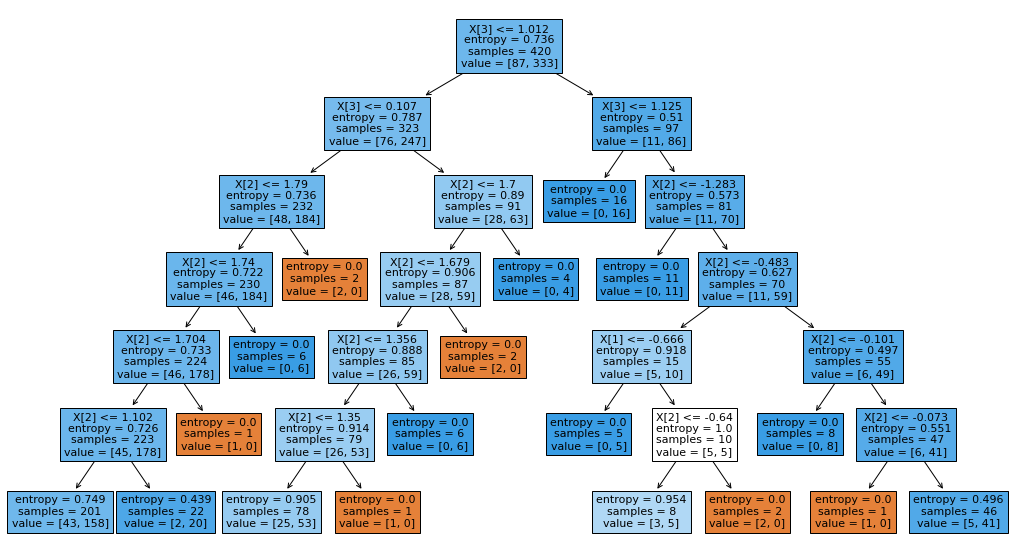

In [16]:
trr = DecisionTreeClassifier(criterion="entropy",max_depth=6,splitter="best")
xscal = scal.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(xscal,y,test_size=0.30,random_state=12,stratify=y)
trr.fit(x_train,y_train)
y_pred_test = trr.predict(x_test)
y_pred_train = trr.predict(x_train)
print ("For Test Data")
print("====================")
res(y_pred_test,y_test)
print("====================")
print ("For Train Data")
print("====================")
res(y_pred_train,y_train)
plt.figure(figsize=(18,10))
plot_tree(trr,filled=True);